# Importing Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import seaborn as sns
pd.set_option('display.max_columns', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Questions which needs to be answered

**_As everyone knows, climate change & global warming have become a vital topic in the last ten years. In order to see why this is the case, we are going to investigate temperature alterations. We will look at how temperatures have changed for each continent and the Earth. With this query, we might have a better insight on following questions:_**
<div class="alert alert-block alert-info">

📌1. Is global warming a new thing, or was it always there?  
</div>
<div class="alert alert-block alert-info">
📌2. How much temperatures have changed? 
</div>
<div class="alert alert-block alert-info">
📌3. Is each continent affected by global warming?  
</div>
<div class="alert alert-block alert-info">
📌4. Are temperature alterations differentiate according to the continent? 
</div>
 <div class="alert alert-block alert-info">
📌5. After which year or which range of years, temperature changes have become abnormal?  
 </div>

# Continental Temperature Alterations

In [ ]:
Temp=pd.read_csv("/kaggle/input/temperature-change/Environment_Temperature_change_E_All_Data_NOFLAG.csv",encoding='cp1252')
WorldT=Temp[(Temp["Element"]=="Temperature change") & (Temp["Months"]=="Meteorological year")]#We will work with yearly changes
WT=WorldT.drop(["Area Code","Months Code","Months","Element","Element Code","Unit"],axis=1)#Droping unrelated data
 
NW=WT.T
NW.columns=NW.loc["Area"]
NW.drop("Area",inplace=True)

############Getting continents and the related data
Continents=NW[["Africa","Asia","Europe","Northern America","South America","Australia","Antarctica"]] 
Continents=Continents.apply(lambda x: x*10)
Continents=Continents.rename(columns={"Northern America":"N_America","South America":"S_America"})
Continents.reset_index(level=0, inplace=True)
Continents=Continents.rename(columns={"index":"Area"})
idx = Continents.columns[1:].tolist()

Continents.head()

*After we got our continent values, we will look at the distribution of temperature changes for each continent with violin plots.*

*For those who do not know how to read the violin plot's anatomy, we can introduce it. It's very simple.*

 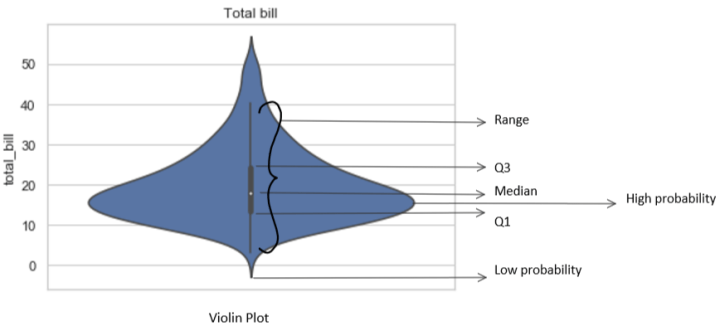

In [ ]:
fig, ax = plt.subplots(figsize =(25, 10)) 
sns.violinplot(ax = ax, data = Continents.iloc[:,1:]) 

*As we can see, extreme values occur mostly in Europe and North America*

*We can do the same investigation with box-whisker plots. But this time, we will mark low probability point(Q0) and Q3(upper quartile). And we will take the Q0-Q3 interval as our interval, which includes the non-abnormal values. (We haven't taken Q1-Q3 interval because our purpose is finding extremely high temperature changes-not low-.*

In [ ]:
#Creating the box-whisker plots
fig, ax = plt.subplots(figsize =(25, 10)) 
plt.boxplot([Continents["Africa"],Continents["Asia"],Continents["Europe"],Continents["N_America"],Continents["S_America"],Continents["Australia"],Continents["Antarctica"]])

#Creating the boundary lines, which we use later on to indicate boundaries for each continent.
plt.axhline(12.5, 0.3,0.42, label='pyplot horizontal line',linewidth=4, color='r')
plt.axhline(-10, 0.3,0.42, label='pyplot horizontal line',linewidth=4, color='r')

plt.axhline(11.5, 0.45,0.55, label='pyplot horizontal line',linewidth=4, color='r')
plt.axhline(-10, 0.45,0.55, label='pyplot horizontal line',linewidth=4, color='r')

plt.axhline(9.5, 0.3-0.15,0.38-0.1, label='pyplot horizontal line',linewidth=4, color='r')
plt.axhline(-3, 0.3-0.15,0.38-0.1, label='pyplot horizontal line',linewidth=4, color='r')

plt.axhline(9, 0.03,0.11, label='pyplot horizontal line',linewidth=4, color='r')
plt.axhline(-3, 0.03,0.11, label='pyplot horizontal line',linewidth=4, color='r')

plt.axhline(8, 0.6,0.7, label='pyplot horizontal line',linewidth=4, color='r')
plt.axhline(-3, 0.6,0.7, label='pyplot horizontal line',linewidth=4, color='r')

plt.axhline(8, 0.72,0.85, label='pyplot horizontal line',linewidth=4, color='r')
plt.axhline(-5, 0.72,0.85, label='pyplot horizontal line',linewidth=4, color='r')

plt.axhline(6,0.87,0.98, label='pyplot horizontal line',linewidth=4, color='r')
plt.axhline(-8,0.87,0.98, label='pyplot horizontal line',linewidth=4, color='r')
plt.xticks([1, 2, 3,4,5,6,7], ["Africa","Asia","Europe","N_America","S_America","Australia","Antarctica"])

*Now, we will create a bar for each continent, and each bar's height will represent the temperature change for that year. I am saying "that year" because we will create an animation plot. Otherwise, we can't show bars for each year. Our bar heights will change according to year. To generate these animation graphs, we will use matplotlib's Funcanimation() function.*

In [ ]:
####Creating colors to give to each bar.
cmap=plt.get_cmap("tab20")
colors=cmap(np.linspace(0, 1, len(Continents.columns)))
color_dict=dict(zip(Continents.columns,colors))
colors=[color_dict[country] for country in Continents.columns]
###


fig = plt.figure(figsize=(20,10))
ax = plt.axes()

###Creating our function to use in the FuncAnimation()
def animate(i):
    #Clear axis
    ax.cla()
    
    #Create bar for each continent's temperature  
    bars=ax.bar(idx, Continents.iloc[i,1:], color=colors)
    a=0
    
    #Showing temperatures right over on the bars
    for bar in bars:
        a+=1
        ax.text(bar.get_x()+0.2,bar.get_y()+bar.get_height()+0.01,str(round(Continents.values[i][a],2)),fontsize = 25)
    #Showing year on the right top
    ax.text(5,27,str(Continents["Area"].iloc[i]),fontsize=35)
    
    ###Setting y_axis interval//adjusting size of x ticks//removing y_axis ticks//giving y label name (all respectively)
    ax.set_ylim(-10,28)
    ax.tick_params(axis="x", labelsize=25) 
    ax.axes.get_yaxis().set_ticks([])
    ax.set_ylabel("Temperature C$^{\circ}$",fontsize=35)
    
    #Removing spines on the right, top, left
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    
    #Setting table title// styling x_tick labels
    ax.set_title("Continental Temperature Alterations",fontsize=25, loc='left')
    ax.set_xticklabels(idx,style="italic",alpha=0.7, rotation=30)
    
    
    ### Using the same Q0-Q3 normal intervals that we have created in the prior box-whisker plots
    ax.axhline(12.5, 0.31,0.42, label='pyplot horizontal line',linewidth=4, color='r')
    ax.axhline(-10, 0.31,0.42, label='pyplot horizontal line',linewidth=4, color='r')

    ax.axhline(11.5, 0.46,0.55, label='pyplot horizontal line',linewidth=4, color='r')
    ax.axhline(-10, 0.46,0.55, label='pyplot horizontal line',linewidth=4, color='r')
    
    ax.axhline(9.5, 0.18,0.28, label='pyplot horizontal line',linewidth=4, color='r')
    ax.axhline(-3, 0.18,0.28, label='pyplot horizontal line',linewidth=4, color='r')

    ax.axhline(9, 0.05,0.152, label='pyplot horizontal line',linewidth=4, color='r')
    ax.axhline(-3, 0.05,0.152, label='pyplot horizontal line',linewidth=4, color='r')

    ax.axhline(8, 0.57,0.68, label='pyplot horizontal line',linewidth=4, color='r')
    ax.axhline(-3, 0.57,0.68, label='pyplot horizontal line',linewidth=4, color='r')

    ax.axhline(8, 0.72,0.83, label='pyplot horizontal line',linewidth=4, color='r')
    ax.axhline(-5, 0.72,0.83, label='pyplot horizontal line',linewidth=4, color='r')

    ax.axhline(6,0.85,0.96, label='pyplot horizontal line',linewidth=4, color='r')
    ax.axhline(-8,0.85,0.96, label='pyplot horizontal line',linewidth=4, color='r')
    ###
     
    return fig,

### Matplotlib's FuncAnimation() has a simple logic:
# 1. It takes the first parameter as a figure. This means "draw on this artist layer(figure)."
# 2. For the second parameter, it takes the function that we will create a changing animation.
# 3.As third, it takes frames parameter, which works with animate function. With animate function, it works like a "for loop."
#   For example, we have given frames=59, this means:
#       for a in range(59):
#              anim(a)
# 4.Interval means "Delay between frames in milliseconds."

anim = FuncAnimation(fig, animate, frames=59, interval=160, repeat=False)
plt.show()
 


#Kaggle does not have the proper backend for imidate plotting of animation functions. Therefore, we need first save it, then upload it to our markdown area.
anim.save('myAnimationX8X.gif', writer='imagemagick', fps=10)


 

![](./myAnimationX8X.gif)

*Here, red lines represent the Q1-Q3 interval for each continent, which we have created in the prior code area.*

# What can we infer from this animation graph & How can we use it to answer our questions?

*As we see, temperatures have increased and exceeded in each continent, especially in 2005-2019. From that, we can infer global warming is really "global" and affects every continent. However, the size of the effect alters for each continent. For instance, the increase in temperature in Europe & North America is much more significant than in other continents.*
*Let's try to answer some of our starting questions.*


>1. Is global warming a new thing, or was it always there? ---------> It's not so old, abnormal increasements in temperatures have emerged in years of 2005-1019

>2. How much temperature levels have changed?------>It varies for each continent. Also, it's not healthy to use our animation graph for this question. (We will look at this in the second plot)

>3. Is each continent affected by global warming?------------------->Yes, as we have seen, each continent exceeds its non-abnormal interval.

>4. Are temperature alterations differentiate according to the continent?------->Yes.

>5. After which year or which range of years, temperature changes have become abnormal?------->In years of 2005-1019

# Overall Temperature Change of The Earth

*The answers that we have given for Q2 wasn't enough.Also, to be sure, it's better to answer Q1/Q5 by looking at World's temperature change.*

In [ ]:
World=WT[WT["Area"]=="World"].T.reset_index().drop(0)#Taking the Earth's temperature changes per year
World.head()#8430 stands for temperature change for that year

*First, as we have done for continents, we will find our normal interval(the interval which includes temperature values that are not so extreme). Then we will use this interval in our plot as our normal(non-abnormal) interval.*

In [ ]:
plt.boxplot([World[8430]])
plt.axhline(0.95, 0,1, label='pyplot horizontal line',linewidth=4, color='purple')
plt.axhline(-0.28, 0,1, label='pyplot horizontal line',linewidth=4, color='purple')

In [ ]:
###Creating an empty x, y list, which we are going to append our every x,y values.//Creating an empty line which we are going to upload our x,y lists
fig2 = plt.figure(figsize=(30,15))
ax = plt.axes()
x, y = [], []    
line, = ax.plot(0,0,alpha=0)
###

### We are going to create a colormap to dramatize the change of the temperature levels. Our values under zero will be blue, and zero values will be 0, values above zero will be red.
### In order to check this colormap/color bar you can google it with the following key words"coolwarm color bar matplotlib"
my_cmap = plt.cm.get_cmap('coolwarm')
All_C=[]
for a in range(0,59):
    Color =10*World.iloc[a,1]/max(World.iloc[:,1])
    All_C.append(my_cmap(Color))
### 


### plt.plot can not use colormap values directly. In order to use these, we need to configurate it witk LineCollection() function. LineCollection function paints the plt.plot values according to their starting point value.
### For instance, if our line is ((1,-2),2,5) this line will be plotted as blue tone.
from matplotlib.collections import LineCollection 
segments = []
for x1,x2,y1,y2 in zip(range(1960,1961+59),range(1961,1961+59),World.iloc[:,1],World.iloc[1:,1]):
        segments.append([(x1,y1),(x2,y2)])
lc=LineCollection(segments,colors=All_C,linewidths=2)
###



def animate(i):  
   

    #Adding LineCollection() to the axis
    ax.add_collection(lc)

    #Creating a moving x axis.Each time i increases our x_lim increases too.//Setting a fixed y_lim
    ax.set_xlim(1960,1962+i)
    ax.set_ylim(-1,2)

    #Setting title/label names//Adjusting sizes
    ax.set_title("Overall Temperature Change of The Earth",fontsize=35)
    ax.tick_params(axis="x", labelsize=30)
    ax.tick_params(axis="y", labelsize=30) 
    ax.set_ylabel("Temperature C$^{\circ}$",fontsize=48)
    ax.set_xlabel("Year",fontsize=48)

    #Adding values to our x&y list//Adding x&y lists to our plotline. (In order to keep the old values, we do not directly add our values to our plotline. Instead of this, each time we add the list of (x,y)'s to our plotline.)
    x.append(i+1960)
    y.append(World.iloc[i,1])
    line.set_xdata(x)
    line.set_ydata(y)

    #Removing spines on the right and top
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ###Adding our normal interval that we have created in the prior code area
    L1=ax.axhline(0.95, 0,1, label='pyplot horizontal line',linewidth=4, color='purple')
    L2=ax.axhline(-0.28, 0,1, label='pyplot horizontal line',linewidth=4, color='purple')
    ax.axhspan(-0.28,0.95, facecolor="purple", alpha=0.01)

    #Adding a line which indicates the 0.We can say this zero line
    ax.axhline(0, 0,1, label='pyplot horizontal line',linewidth=3, color='black')
    return line,

 
 
animplot = FuncAnimation(fig2, animate, frames=59, repeat_delay=1e2, blit=False,repeat=False)
plt.show()
plt.close(fig2) 
animplot.save('WorldT4plot.gif', writer='pillow', fps=10)
  

![](./WorldT4plot.gif)

# The plot's answers to our questions

*Our questions were:*
> Q2:How much temperature levels have changed? / Answer: Globally temperature change is between 1.5C$^{\circ}$-2C$^{\circ}$.


> Q3:Is global warming a new thing, or was it always there? / Answer: The result that we have found here justifies the result found with bar plots. Global change is a recent phenomenon.


>Q5:After which year or which range of years, temperature changes have become abnormal? / Answer: We can see extreme values since 2000, but after 2005 it has become significant.

<div class="alert alert-block alert-info">
# Conclusion 
 
<div class="alert alert-block alert-info">
As the last plot shows, we are in a dangered position right now. If this temperature trend continues like that, events might be catastrophic. When we say the overall global temperature change is  1.5C$^{\circ}$-2C$^{\circ}$  it might not seem like a big deal, but it is. It's because, as we have seen, this temperature change is not evenly distributed around our planet, as our bar plot shows temperature levels change at different rates for each continent. This change might lead to destructive anomalies and unexpected changes.
</div>
<div class="alert alert-block alert-info">
Anomalies and unexpected changes that can occur:
    
<div class="alert alert-block alert-info">
    1. As we say, we can infer from our bar plots, Europe's temperature levels have risen dramatically. In this case, the Netherlands is in great danger because if this temperature level increase leads to sea-level rise, coastal countries with low elevation(like the Netherlands) might sink and disappear.
</div>

<div class="alert alert-block alert-info">
    2. A large number of areas might become deserts. If this happens, this can lead to so many migrations
</div>

<div class="alert alert-block alert-info">
    3. Icy areas(areas like Russia, Scandinavian countries, Alaska, etc.) may become good agricultural areas for the future. When temperature levels increase, climates in these areas might become warmer. Therefore people can use these areas for agriculture.*
</div>
<div class="alert alert-block alert-info">
    4. Climate change may lead to the change of globally powerful countries.Russia,Canada,Scandinavian countries,etc. may become global powers because of the change of the proper places for agriculture.
</div>
</div>
<div class="alert alert-block alert-info">
----------This list goes on and on; therefore, I will add a video that I find pretty insightful and useful while preparing this list---------------
</div>
 </div>

*I couldn't add this one as video into kaggle so if you want to see the video you can go the following link:*

https://www.youtube.com/watch?v=ZfFvLJyPf3o&t=675s&ab_channel=RealLifeLore

# Is It Too Late To Stop?
*I will also provide a link for that too. One of my favorite channels on youtube(Kurzgesagt - In a Nutshell) already clearly explains it. I encourage you to take a look at it.*

<iframe width="1335" height="763" src="https://www.youtube.com/embed/wbR-5mHI6bo" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<div class="alert alert-success"  style="font-size:18px;">
    
   If you have any questions you can ask in the comments.Also if you think this notebook is usefull and other people get something out of it, you can upvote.
    